## CUSTOMER CHURN ANALYSIS - EXPLORATORY DATA ANALYSIS

### Section 1: Load and Explore Data

##### 1.1 Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### 1.2 Load Data

In [2]:
df = pd.read_csv('Data/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##### 1.3 Basic Data Info (shape, dtypes, missing values)

In [3]:
print(f'Shape : {df.shape}\n')
print(f'Columns : {df.columns}\n')
print(df.info())
print(f'\nNull values : \n{df.isnull().sum()}')
print(f'\nDuplicates : \n{df.duplicated().sum()}')

Shape : (7043, 21)

Columns : Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   Intern

### Section 2: Univariate Analysis

##### 2.1 Churn Distribution

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn Percentage:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


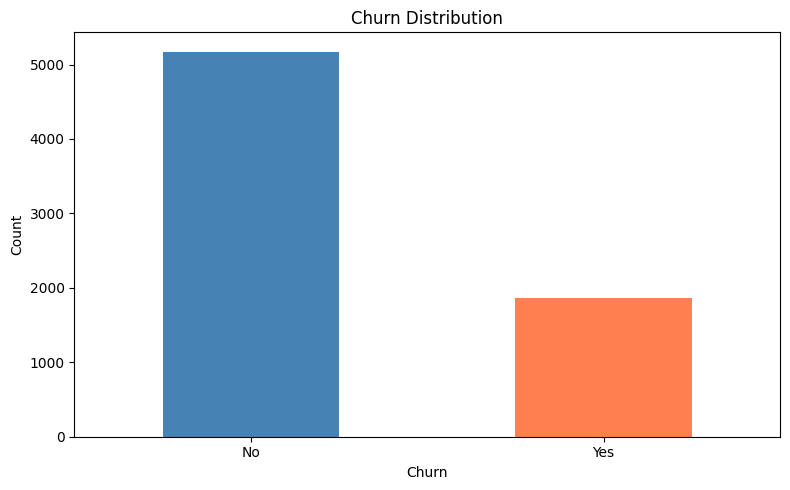

In [4]:
print(df['Churn'].value_counts())
print("\nChurn Percentage:")
print(df['Churn'].value_counts(normalize=True) * 100)

# Visualize
plt.figure(figsize=(8, 5))
df['Churn'].value_counts().plot(kind='bar', color=['steelblue', 'coral'])
plt.title('Churn Distribution')
plt.ylabel('Count')
plt.xlabel('Churn')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The bar chart shows the count of customers by churn status. 
- Out of 7,043 customers analyzed, 5,174 did not churn (blue bar) and 1,869 churned (orange bar). 
- This represents a 73.4% retention rate and 26.6% churn rate. The imbalance in class distribution is evident from the visual difference in bar heights.

##### 2.2 Tenure Distribution

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64


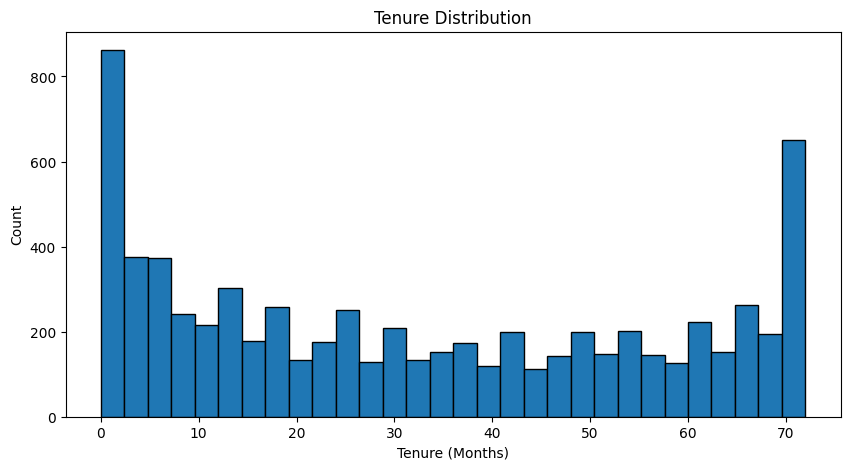

In [5]:
tenure_counts = df['tenure'].value_counts()
print(tenure_counts)

plt.figure(figsize = (10,5))
plt.hist(df['tenure'], bins = 30, edgecolor = 'black')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.title('Tenure Distribution')
plt.show()

The histogram displays customer tenure in months with a bimodal pattern. 
- The largest peak occurs at 0 months (900+ customers), indicating many new customers. A secondary peak appears at 72 months (650+ customers), representing long-term customers. 
- Between months 1-71, the distribution is relatively flat with counts around 50-300 customers per month, suggesting customer attrition over time.

##### 2.3 Internet Service Distribution

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


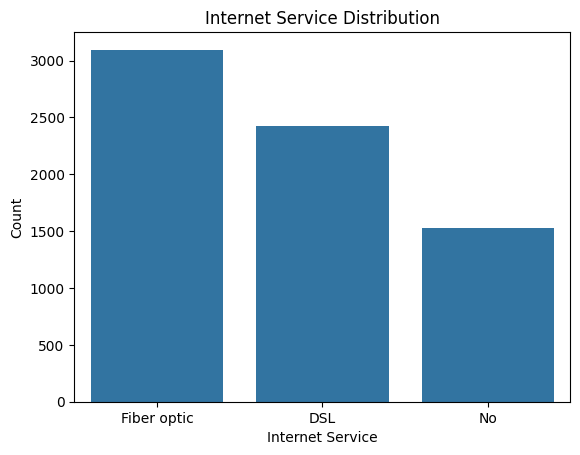

In [6]:
internet_service = df['InternetService'].value_counts()
print(internet_service)

sns.countplot(x = 'InternetService', data = df, order = internet_service.index)
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.title('Internet Service Distribution')
plt.show()

The bar chart shows the count of customers by internet service type. 
- Fiber optic has the highest count (3,096 customers), followed by DSL (2,421 customers), and no internet service (1,526 customers). 
- Fiber optic represents 44% of the customer base, making it the dominant service type.

##### 2.4 Gender Distribution

gender
Male      3555
Female    3488
Name: count, dtype: int64


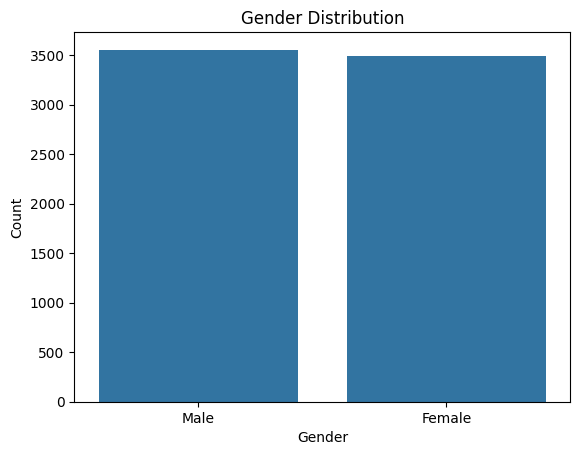

In [7]:
gender_counts = df['gender'].value_counts()
print(gender_counts)

sns.countplot(x ='gender', data = df, order = gender_counts.index)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

The bar chart shows the count of customers by gender. 
- The dataset contains 3,555 male customers and 3,488 female customers. 
- The distribution is nearly balanced with males representing 50.5% and females representing 49.5% of the customer base, showing minimal gender imbalance in the dataset.

##### 2.5 Streaming TV Distribution

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64


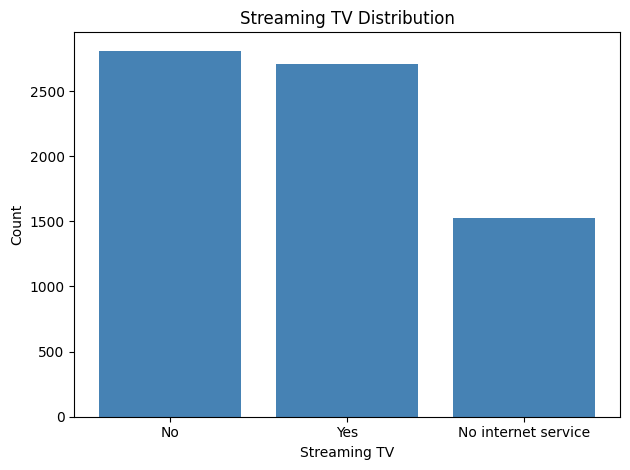

In [8]:
streaming_tv_counts = df['StreamingTV'].value_counts()
print(streaming_tv_counts)
plt.bar(streaming_tv_counts.index, streaming_tv_counts.values, color='steelblue')
plt.xlabel('Streaming TV')
plt.ylabel('Count')
plt.title('Streaming TV Distribution')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The bar chart displays the count of customers by streaming TV service status. 
- The majority of customers do not have streaming TV (2,800+ customers), followed by customers with streaming TV service (2,700+ customers). 
- A smaller segment (1,500+ customers) have no internet service, and therefore cannot use streaming TV. 
- This shows that streaming TV adoption is moderate among the customer base.

##### 2.6 Streaming Movies Distribution

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64


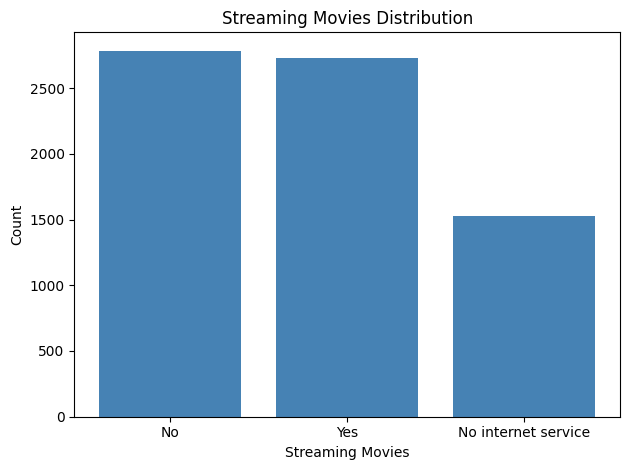

In [9]:
streaming_movies_counts = df['StreamingMovies'].value_counts()
print(streaming_movies_counts)
plt.bar(streaming_movies_counts.index, streaming_movies_counts.values, color='steelblue')
plt.xlabel('Streaming Movies')
plt.ylabel('Count')
plt.title('Streaming Movies Distribution')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The bar chart shows the count of customers by streaming movies service status. 
- The distribution is similar to streaming TV, with 2,785 customers not having streaming movies, 2,732 customers with the service, and 1,526 customers with no internet service (and therefore cannot use streaming movies). 
- Streaming movies adoption is fairly balanced between customers with and without the service.

### Section 3: Bivariate Analysis - Churn vs Key Features

##### 3.1 Gender vs Churn

Churn     No  Yes
gender           
Female  2549  939
Male    2625  930


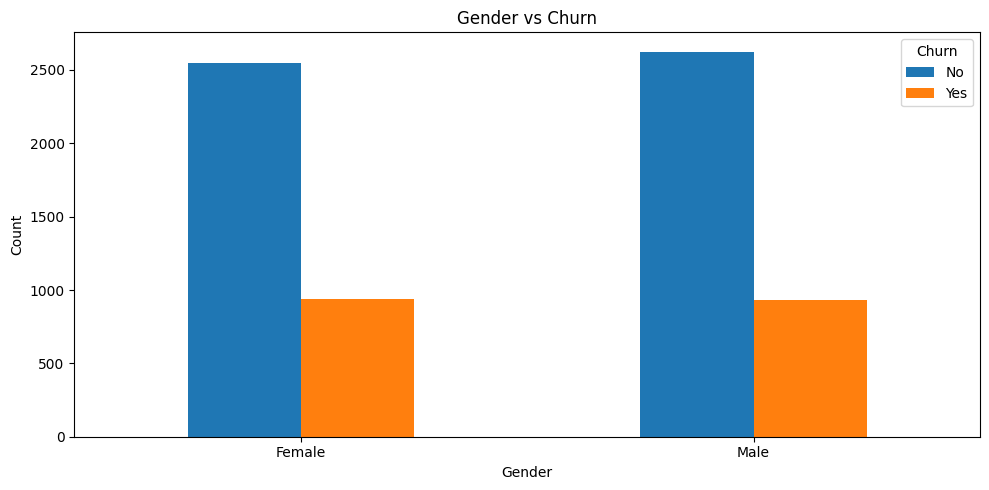

In [10]:
# Gender vs Churn
churn_by_gender = pd.crosstab(df['gender'], df['Churn'])
print(churn_by_gender)

churn_by_gender.plot(kind='bar', figsize=(10, 5))
plt.title('Gender vs Churn')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The grouped bar chart shows churn distribution by gender. 
- For females, 2,549 did not churn (blue) and 939 churned (orange). 
- For males, 2,625 did not churn and 930 churned. 
- The churn rates are nearly identical between genders (approximately 26% for both), indicating gender has minimal impact on churn behavior.

##### 3.2 Tenure vs Churn

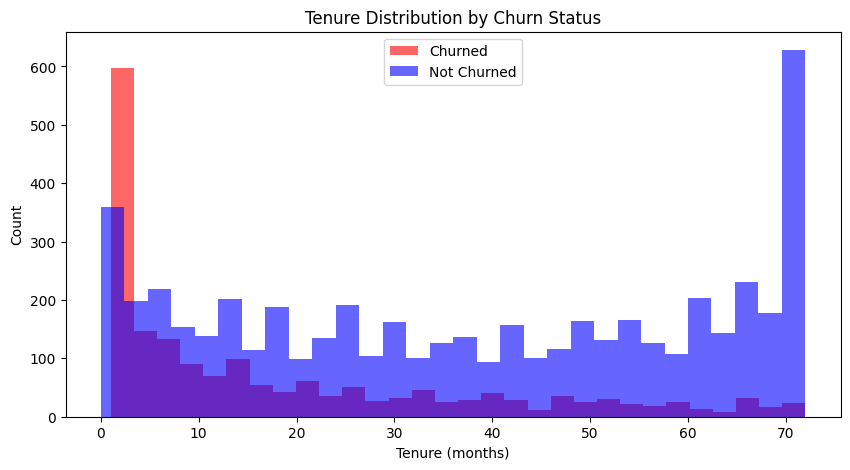

In [11]:
plt.figure(figsize=(10, 5))

# Separate data by churn
churned = df[df['Churn'] == 'Yes']['tenure']
not_churned = df[df['Churn'] == 'No']['tenure']

# Plot overlapping histograms
plt.hist(churned, bins=30, alpha=0.6, label='Churned', color='red')
plt.hist(not_churned, bins=30, alpha=0.6, label='Not Churned', color='blue')

plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.title('Tenure Distribution by Churn Status')
plt.legend()
plt.show()

The overlaid histogram shows tenure distribution separated by churn status. 
- Churned customers (red) are heavily concentrated at 0 months (500+ customers), with minimal presence in later months. 
- Non-churned customers (blue) show a more distributed pattern across all tenure ranges, with a secondary peak at 72 months (600+ customers). 
- This clearly demonstrates that new customers (0 months) have significantly higher churn rates compared to established customers.

##### 3.3 Contract vs Churn

Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858


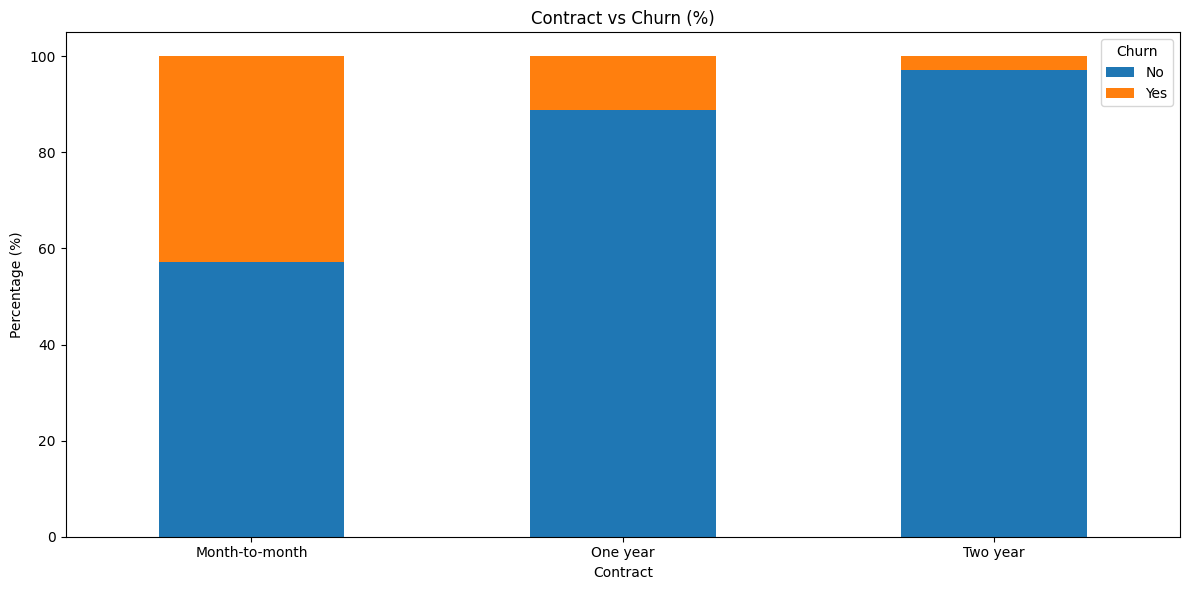

In [12]:
# Contract vs Churn
churn_by_contract = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
print(churn_by_contract)

churn_by_contract.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Contract vs Churn (%)')
plt.ylabel('Percentage (%)')
plt.xlabel('Contract')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The stacked percentage bar chart displays churn rates by contract type. 
- Month-to-month contracts show approximately 43% churn (orange segment) and 57% retention (blue segment). 
- One-year contracts show approximately 11% churn and 89% retention. 
- Two-year contracts show the lowest churn at approximately 3% with 97% retention. 
- The visual clearly demonstrates that longer contract commitments result in significantly lower churn rates.

##### 3.4 Internet Service vs Churn

Churn              No   Yes
InternetService            
DSL              1962   459
Fiber optic      1799  1297
No               1413   113


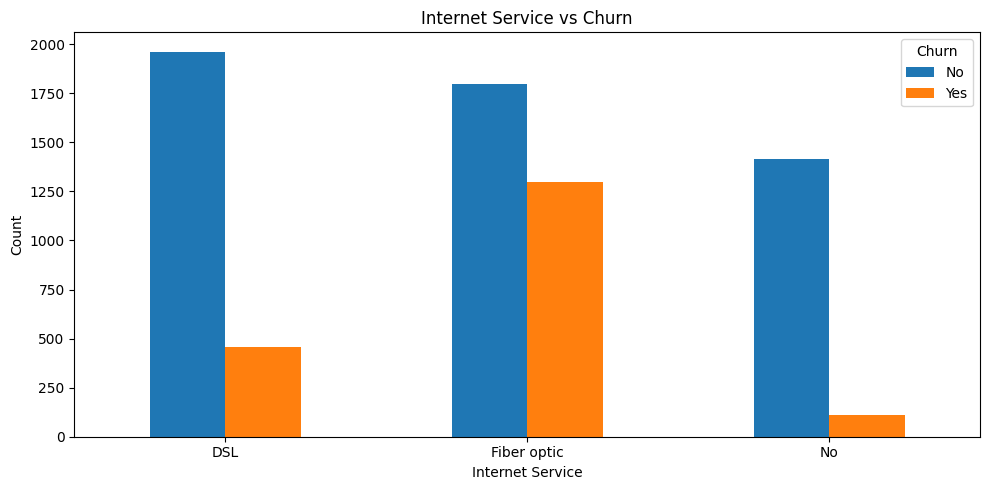

In [13]:
# Internet Service vs Churn
churn_by_internet = pd.crosstab(df['InternetService'], df['Churn'])
print(churn_by_internet)

churn_by_internet.plot(kind='bar', figsize=(10, 5))
plt.title('Internet Service vs Churn')
plt.ylabel('Count')
plt.xlabel('Internet Service')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The grouped bar chart shows churn counts by internet service type. 
- DSL customers have 1,962 who did not churn and 459 who churned (23% churn rate). 
- Fiber optic customers have 1,799 who did not churn and 1,297 who churned (42% churn rate). 
- Customers with no internet service have 1,413 who did not churn and 113 who churned (7% churn rate). 
- Fiber optic customers show significantly higher churn compared to other service types, despite being the most common service.

##### 3.5 TechSupport vs Churn

Churn                       No        Yes
TechSupport                              
No                   58.364526  41.635474
No internet service  92.595020   7.404980
Yes                  84.833659  15.166341


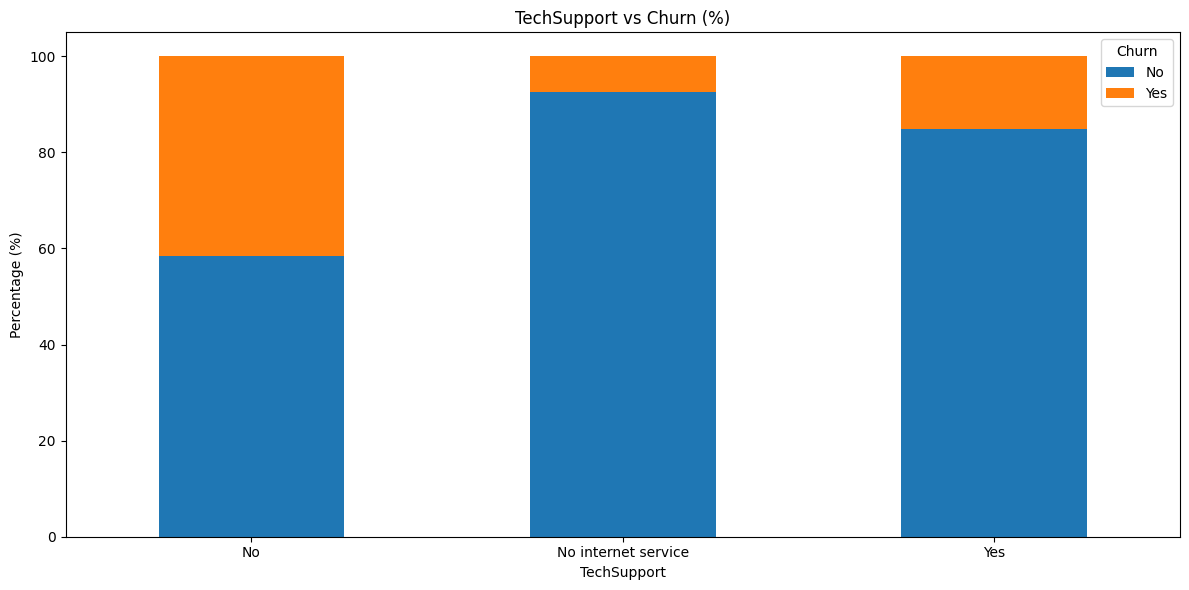

In [14]:
# TechSupport vs Churn
churn_by_techsupport = pd.crosstab(df['TechSupport'], df['Churn'], normalize='index') * 100
print(churn_by_techsupport)

churn_by_techsupport.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('TechSupport vs Churn (%)')
plt.ylabel('Percentage (%)')
plt.xlabel('TechSupport')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The stacked percentage bar chart displays churn rates by tech support status. 
- Customers without tech support show approximately 42% churn (orange segment) and 58% retention (blue segment). 
- Customers with no internet service show approximately 7% churn and 93% retention. 
- Customers with tech support show the lowest churn at approximately 15% with 85% retention. 
- Tech support access is strongly associated with lower churn rates, showing a 27 percentage point reduction in churn.

##### 3.6 OnlineSecurity vs Churn

Churn                       No        Yes
OnlineSecurity                           
No                   58.233276  41.766724
No internet service  92.595020   7.404980
Yes                  85.388806  14.611194


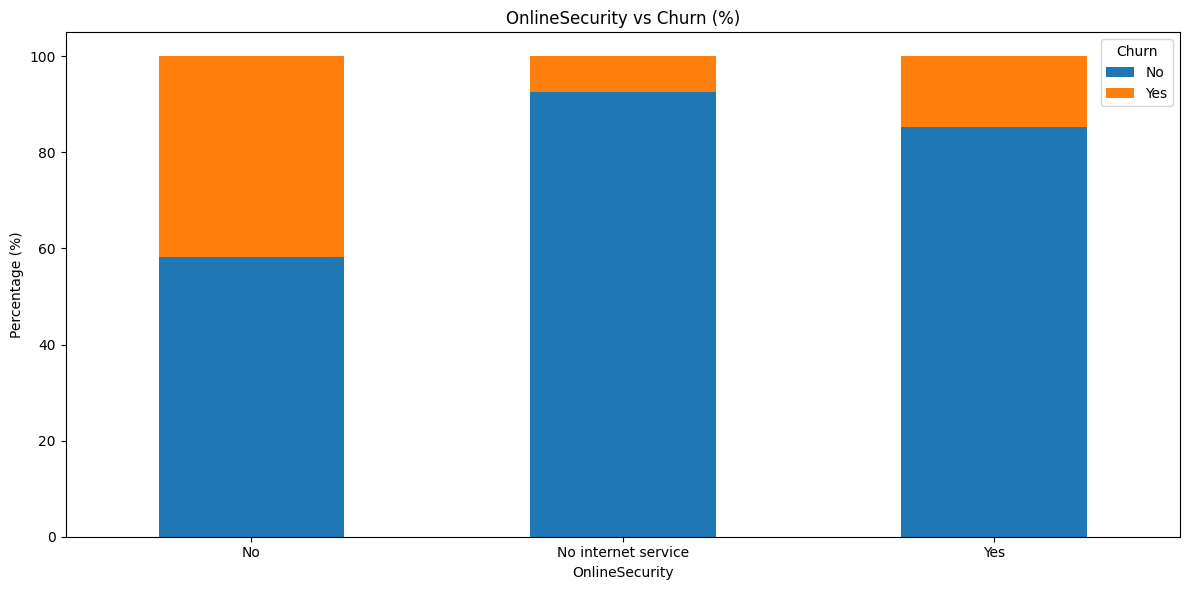

In [15]:
# OnlineSecurity vs Churn
churn_by_security = pd.crosstab(df['OnlineSecurity'], df['Churn'], normalize='index') * 100
print(churn_by_security)

churn_by_security.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('OnlineSecurity vs Churn (%)')
plt.ylabel('Percentage (%)')
plt.xlabel('OnlineSecurity')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The stacked percentage bar chart displays churn rates by online security status. 
- Customers without online security show approximately 42% churn (orange segment) and 58% retention (blue segment). 
- Customers with no internet service show approximately 7% churn and 93% retention. 
- Customers with online security show the lowest churn at approximately 15% with 85% retention. 
- Online security adoption is strongly associated with lower churn rates, showing a 27 percentage point reduction in churn, similar to tech support impact.

##### 3.7 Streaming TV vs Churn

Churn                       No        Yes
StreamingTV                              
No                   66.476868  33.523132
No internet service  92.595020   7.404980
Yes                  69.929812  30.070188


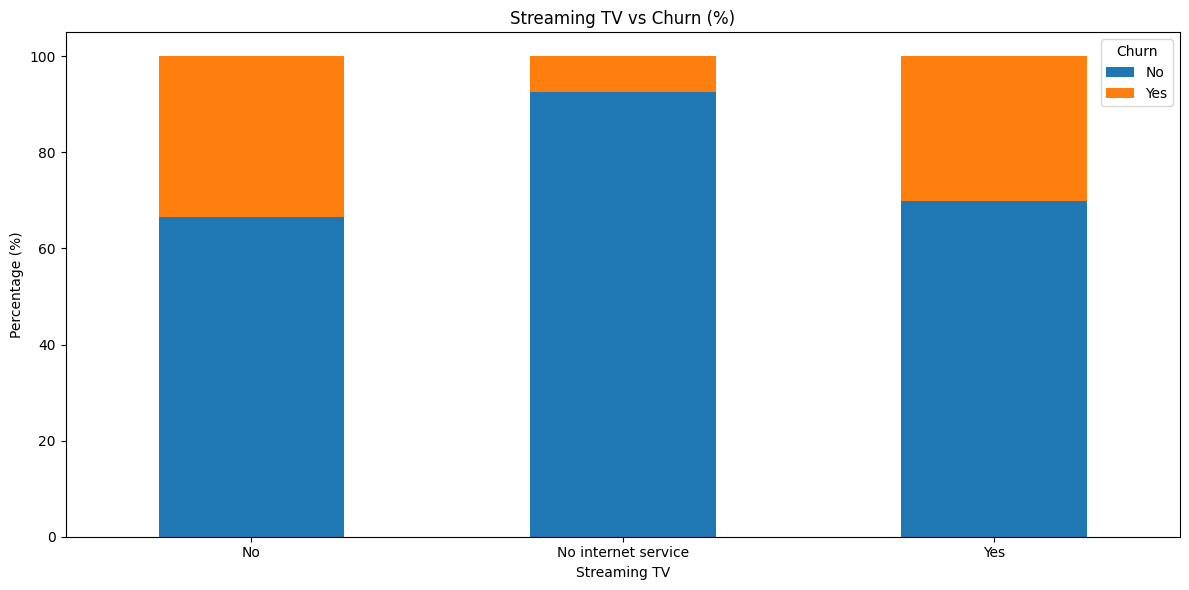

In [16]:
# Streaming TV vs Churn
churn_by_streaming_tv = pd.crosstab(df['StreamingTV'], df['Churn'], normalize='index') * 100
print(churn_by_streaming_tv)

churn_by_streaming_tv.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Streaming TV vs Churn (%)')
plt.ylabel('Percentage (%)')
plt.xlabel('Streaming TV')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The stacked percentage bar chart displays churn rates by streaming TV status. 
- Customers without streaming TV show approximately 33% churn (orange segment) and 67% retention (blue segment). 
- Customers with no internet service show approximately 7% churn and 93% retention. 
- Customers with streaming TV show approximately 30% churn and 70% retention. 
- The difference in churn rates between customers with and without streaming TV is minimal (3 percentage points), indicating streaming TV has limited impact on churn behavior.

##### 3.8 Streaming Movies vs Churn

Churn                       No        Yes
StreamingMovies                          
No                   66.319569  33.680431
No internet service  92.595020   7.404980
Yes                  70.058565  29.941435


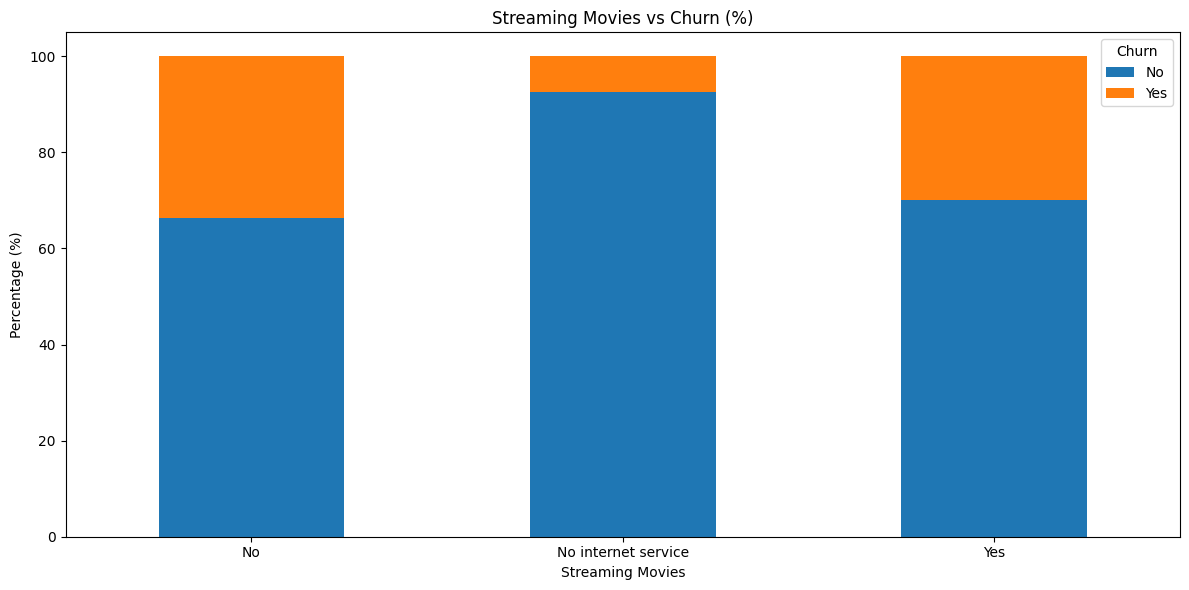

In [17]:
# Streaming Movies vs Churn
churn_by_streaming_movies = pd.crosstab(df['StreamingMovies'], df['Churn'], normalize='index') * 100
print(churn_by_streaming_movies)

churn_by_streaming_movies.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Streaming Movies vs Churn (%)')
plt.ylabel('Percentage (%)')
plt.xlabel('Streaming Movies')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The stacked percentage bar chart displays churn rates by streaming movies status. 
- Customers without streaming movies show approximately 34% churn (orange segment) and 66% retention (blue segment). 
- Customers with no internet service show approximately 7% churn and 93% retention. 
- Customers with streaming movies show approximately 30% churn and 70% retention. 
- Similar to streaming TV, the difference in churn rates between customers with and without streaming movies is minimal (4 percentage points), indicating streaming services have limited direct impact on churn reduction.

##### 3.9 Monthly Charges vs Churn

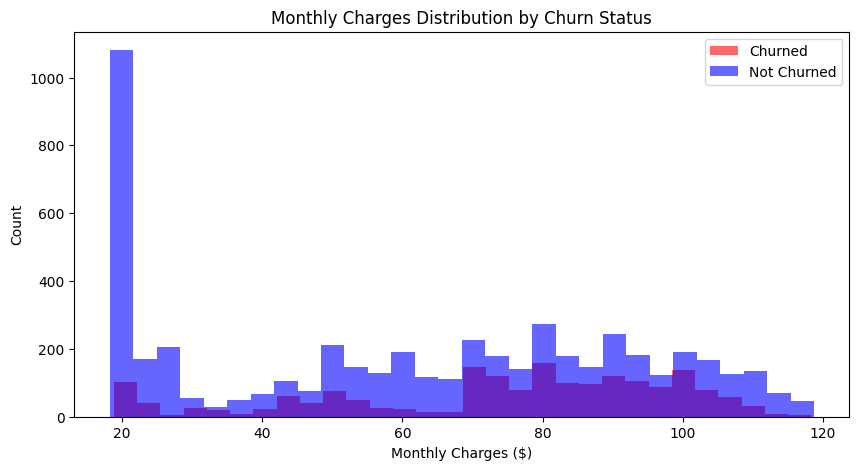

Churned customers - Average monthly charges: 74.44133226324237
Not churned customers - Average monthly charges: 61.26512369540008


In [18]:
# Monthly Charges vs Churn
plt.figure(figsize=(10, 5))
churned = df[df['Churn'] == 'Yes']['MonthlyCharges']
not_churned = df[df['Churn'] == 'No']['MonthlyCharges']

plt.hist(churned, bins=30, alpha=0.6, label='Churned', color='red')
plt.hist(not_churned, bins=30, alpha=0.6, label='Not Churned', color='blue')

plt.xlabel('Monthly Charges ($)')
plt.ylabel('Count')
plt.title('Monthly Charges Distribution by Churn Status')
plt.legend()
plt.show()

# Summary stats
print("Churned customers - Average monthly charges:", churned.mean())
print("Not churned customers - Average monthly charges:", not_churned.mean())

The overlaid histogram shows monthly charges distribution separated by churn status. 
- Churned customers (red) are heavily concentrated at lower monthly charges ($20-30 range), with presence across the entire charge spectrum. 
- Non-churned customers (blue) show a more distributed pattern with peaks at low charges ($20-30 range) and mid-range charges ($70-80 range). 
- On average, churned customers pay higher monthly charges ($74.44) compared to non-churned customers ($61.27), suggesting price sensitivity may 
contribute to churn behavior.

### Section 4: Deep Dive Analysis

##### 4.1 New Customers (0-3 months) - TechSupport Impact

Churn Rate for New Customers (0-3 months) by TechSupport:
Churn                       No        Yes
TechSupport                              
No                   31.652661  68.347339
No internet service  72.868217  27.131783
Yes                  56.666667  43.333333


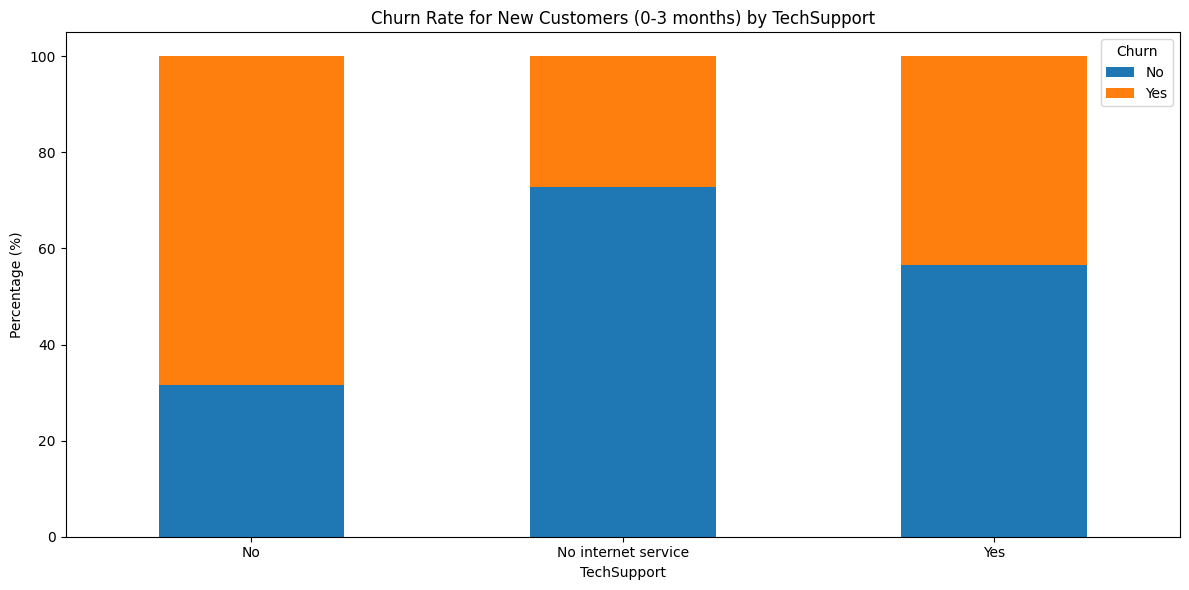

In [19]:
# Filter new customers (tenure 0-3 months)
new_customers = df[df['tenure'] <= 3]

# Check churn rate for new customers by TechSupport
churn_by_techsupport_new = pd.crosstab(new_customers['TechSupport'], new_customers['Churn'], normalize='index') * 100
print("Churn Rate for New Customers (0-3 months) by TechSupport:")
print(churn_by_techsupport_new)

# Visualize
churn_by_techsupport_new.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Churn Rate for New Customers (0-3 months) by TechSupport')
plt.ylabel('Percentage (%)')
plt.xlabel('TechSupport')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The stacked percentage bar chart shows churn rates for new customers segmented by tech support status. 
- New customers without tech support show approximately 68% churn (orange segment) and 32% retention (blue segment). 
- New customers with no internet service show approximately 27% churn and 73% retention. 
- New customers with tech support show the lowest churn at approximately 43% with 57% retention. 
- Tech support reduces churn by 25 percentage points for new customers, demonstrating its critical importance during the customer evaluation phase.

##### 4.2 Long-term Customers (24+ months) - TechSupport Impact


Churn Rate for Long-term Customers (24+ months) by TechSupport:
Churn                       No        Yes
TechSupport                              
No                   74.712644  25.287356
No internet service  98.492462   1.507538
Yes                  90.223642   9.776358


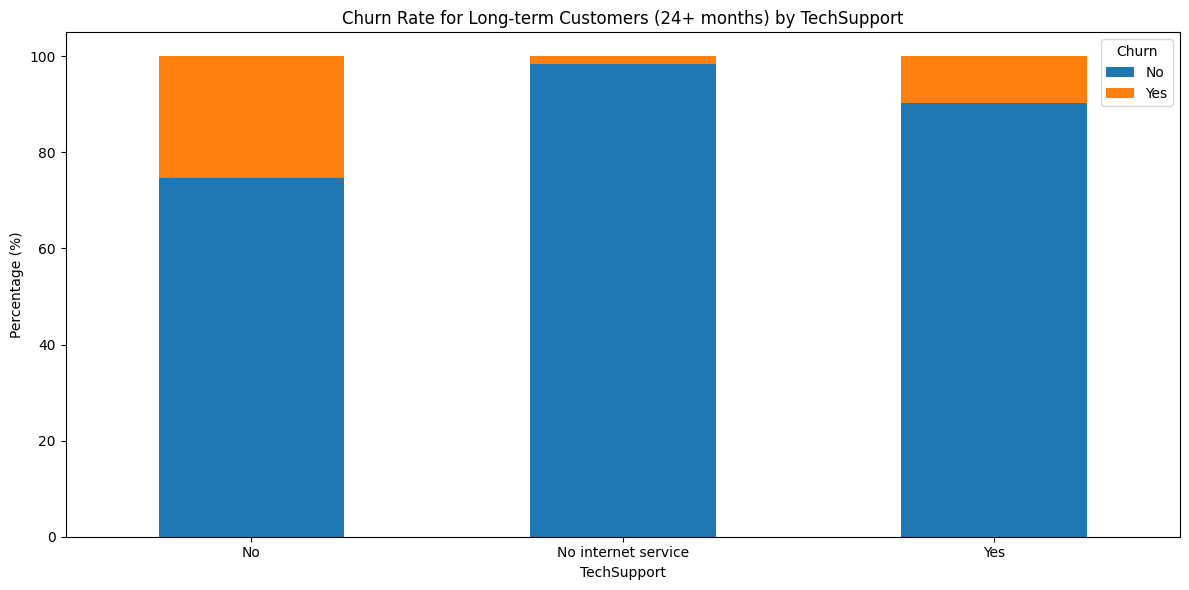

In [20]:
# Long-term customers (24+ months)
long_customers = df[df['tenure'] >= 24]
churn_by_techsupport_long = pd.crosstab(long_customers['TechSupport'], long_customers['Churn'], normalize='index') * 100
print("\nChurn Rate for Long-term Customers (24+ months) by TechSupport:")
print(churn_by_techsupport_long)

# Visualize
churn_by_techsupport_long.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Churn Rate for Long-term Customers (24+ months) by TechSupport')
plt.ylabel('Percentage (%)')
plt.xlabel('TechSupport')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The stacked percentage bar chart shows churn rates for long-term customers (24+ months tenure) segmented by tech support status. 
- Long-term customers without tech support show approximately 25% churn (orange segment) and 75% retention (blue segment). 
- Long-term customers with no internet service show approximately 2% churn and 98% retention. 
- Long-term customers with tech support show the lowest churn at approximately 10% with 90% retention. 
- Tech support reduces churn by 15 percentage points for long-term customers, showing a smaller but still significant protective effect compared to new customers.

##### 4.3 Month-to-Month Customers - TechSupport & Internet Service

Month-to-Month Customers: Churn Rate by TechSupport
Churn                       No        Yes
TechSupport                              
No                   49.626866  50.373134
No internet service  81.106870  18.893130
Yes                  69.299553  30.700447

Month-to-Month Customers: Churn Rate by Internet Service
Churn                   No        Yes
InternetService                      
DSL              67.784137  32.215863
Fiber optic      45.394737  54.605263
No               81.106870  18.893130


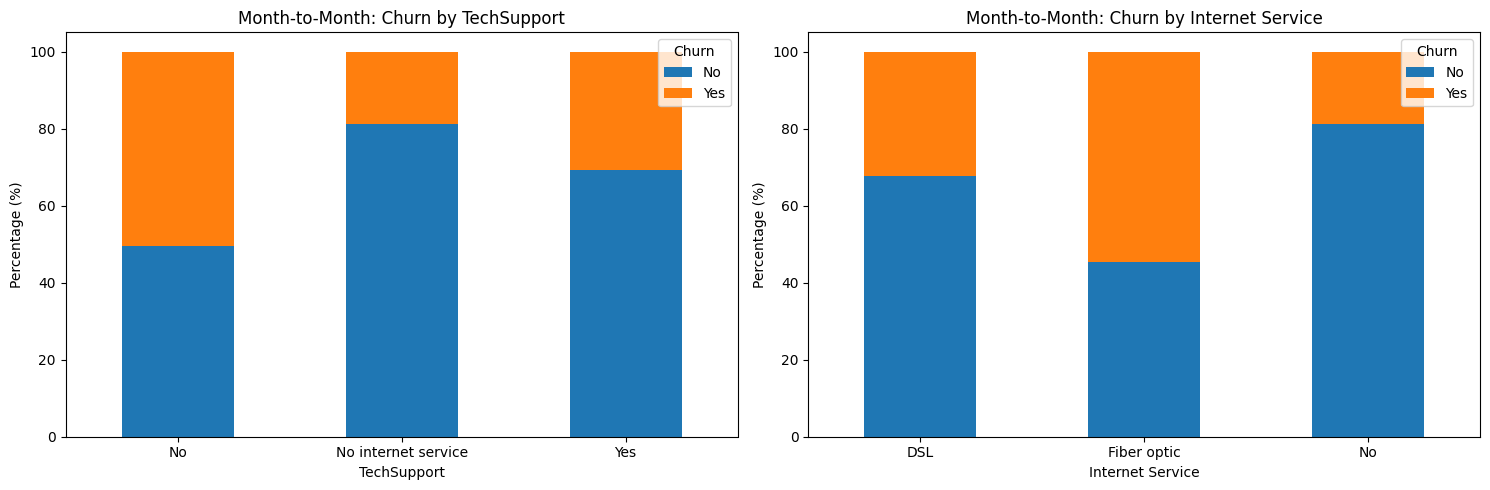

In [21]:
# Month-to-month customers by TechSupport
mtm_by_techsupport = pd.crosstab(df[df['Contract'] == 'Month-to-month']['TechSupport'], 
                                  df[df['Contract'] == 'Month-to-month']['Churn'], 
                                  normalize='index') * 100
print("Month-to-Month Customers: Churn Rate by TechSupport")
print(mtm_by_techsupport)

# Month-to-month customers by Internet Service
mtm_by_internet = pd.crosstab(df[df['Contract'] == 'Month-to-month']['InternetService'], 
                               df[df['Contract'] == 'Month-to-month']['Churn'], 
                               normalize='index') * 100
print("\nMonth-to-Month Customers: Churn Rate by Internet Service")
print(mtm_by_internet)

# Visualize both
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

mtm_by_techsupport.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Month-to-Month: Churn by TechSupport')
axes[0].set_ylabel('Percentage (%)')
axes[0].set_xlabel('TechSupport')
axes[0].tick_params(axis='x', rotation=0)

mtm_by_internet.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Month-to-Month: Churn by Internet Service')
axes[1].set_ylabel('Percentage (%)')
axes[1].set_xlabel('Internet Service')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

The dual bar charts show churn rates for month-to-month contract customers by two dimensions.
- **Left chart (TechSupport):** Customers without tech support show 50% churn, those with no internet service show 18% churn, and those with tech support show 31% churn. Tech support reduces churn by 19 percentage points for this segment.
- **Right chart (Internet Service):** Among month-to-month customers, DSL users show 32% churn, Fiber optic users show 55% churn (highest risk), and those with no internet show 19% churn. Fiber optic month-to-month 
customers represent the highest-risk segment at 55% churn, indicating the compounding effect of flexible 
contracts and service quality issues.

##### 4.4 Internet Service Type vs Monthly Charges

Average Monthly Charges by Internet Service:
InternetService
DSL            58.102169
Fiber optic    91.500129
No             21.079194
Name: MonthlyCharges, dtype: float64


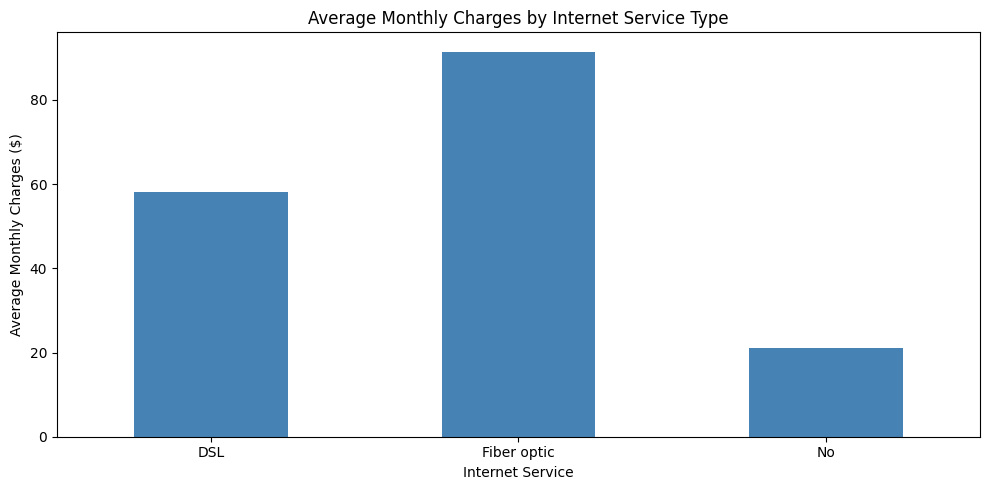

In [22]:
# Average monthly charges by Internet Service
avg_charges_by_internet = df.groupby('InternetService')['MonthlyCharges'].mean()
print("Average Monthly Charges by Internet Service:")
print(avg_charges_by_internet)

# Visualize it
plt.figure(figsize=(10, 5))
avg_charges_by_internet.plot(kind='bar', color='steelblue')
plt.title('Average Monthly Charges by Internet Service Type')
plt.ylabel('Average Monthly Charges ($)')
plt.xlabel('Internet Service')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The bar chart displays average monthly charges for each internet service type. 
- DSL customers pay an average of $58 per month, while Fiber optic customers pay an average of $91 per month (57% higher than DSL). 
- Customers with no internet service pay an average of $20 per month. 
- The chart illustrates that Fiber optic is the premium-priced service offering. Combined with the earlier finding that Fiber optic has the highest 
churn rate (42%), this demonstrates a significant value perception mismatch where customers paying the highest price experience the poorest retention.